# Análisis de Datos con Pandas - Visualizando Datos

* **Autor**: Jose Rodriguez (@Cyb3rPandah)
* **Proyecto**: Infosec Jupyter Book
* **Organización Pública**: [Open Threat Research](https://github.com/OTRF)
* **Licencia**: [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)
* **Referencia**: https://mordordatasets.com/notebooks/small/windows/05_defense_evasion/SDWIN-190403133337.html

## Representando el Archivo JSON como Dataframe usando Pandas

La representación del archivo JSON como un Dataframe de Pandas puede involucrar el uso de comandos como **wget**, **unzip**. Esto fue explicado con más detalle en el notebook que lleva por título **Representando el Archivo JSON como Dataframe usando Pandas**, y además se encuentra en la misma carpeta del presente notebook. Para mantener la estructura del presente notebok en un formato simple, los JSON files requeridos para este workshop ya han sido desargados y descomprimidos. Estos archivos se encuentran en la carpeta **sets_datos**.

! wget https://raw.githubusercontent.com/OTRF/mordor/master/datasets/small/windows/lateral_movement/host/empire_shell_dcerpc_smb_service_dll_hijack.zip  -O sets_datos/empire_shell_dcerpc_smb_service_dll_hijack.zip

! unzip -o sets_datos/empire_shell_dcerpc_smb_service_dll_hijack.zip -d sets_datos/

In [1]:
dllhijack_json = 'sets_datos/empire_shell_dcerpc_smb_service_dll_hijack_2020-09-21232839.json'

### a) Importando la librería Pandas

In [2]:
import pandas as pd

### b) Leyendo Archivo JSON

Usaremos el método **pandas.read_json**.

Referencia: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html

In [3]:
df = pd.read_json(path_or_buf = dllhijack_json, lines = True)

df.head()

,Keywords,SeverityValue,TargetObject,EventTypeOrignal,EventID,ProviderGuid,ExecutionProcessID,host,Channel,UserID,...,KeyType,ClientProcessId,AlgorithmName,ReturnCode,KeyName,KeyFilePath,MiniportNameLen,MiniportName,param4,param3
0,-9223372036854775808,2,HKU\.DEFAULT\Software\Microsoft\Office\16.0\Co...,INFO,13,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3172,wec.internal.cloudapp.net,Microsoft-Windows-Sysmon/Operational,S-1-5-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-9223372036854775808,2,NaN,NaN,10,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3392,wec.internal.cloudapp.net,Microsoft-Windows-Sysmon/Operational,S-1-5-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-9223372036854775808,2,NaN,NaN,10,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3392,wec.internal.cloudapp.net,Microsoft-Windows-Sysmon/Operational,S-1-5-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-9214364837600034816,2,NaN,NaN,5158,{54849625-5478-4994-A5BA-3E3B0328C30D},4,wec.internal.cloudapp.net,security,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-9214364837600034816,2,NaN,NaN,5156,{54849625-5478-4994-A5BA-3E3B0328C30D},4,wec.internal.cloudapp.net,security,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### c) Conociendo las columnas o atributos del Dataframe

Usaremos el método **pandas.DataFrame.info**.

Referencia: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

In [4]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6349 entries, 0 to 6348
Data columns (total 206 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Keywords                   int64  
 1   SeverityValue              int64  
 2   TargetObject               object 
 3   EventTypeOrignal           object 
 4   EventID                    int64  
 5   ProviderGuid               object 
 6   ExecutionProcessID         int64  
 7   host                       object 
 8   Channel                    object 
 9   UserID                     object 
 10  AccountType                object 
 11  ThreadID                   int64  
 12  ProcessGuid                object 
 13  Details                    object 
 14  EventReceivedTime          object 
 15  Opcode                     object 
 16  EventTime                  object 
 17  @timestamp                 object 
 18  SourceModuleType           object 
 19  port                       int64  
 20  Account

## Representando la Variabilidad de la Longitud del CommandLine

### a) Calculando la Longitud del Command Line

Usaremos el método **assign** para agregar una columna nueva a nuestro dataframe. Esta nueva columna mostrará el calculo de la longitud del command line que el processo utilizó.

Referencia: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html

In [5]:
df = (
df[['User']]
    
[(df['EventID'] == 1) & (df['Channel'].str.contains('sysmon',case = False, na = False, regex = False))]
    
.assign(Command_Length = df['CommandLine'].str.len())
)
df = df[df['Command_Length'] <300]

### b) Creando un Diagrama BoxPlot para representar la variabilidad por Usuario

In [6]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,7)})

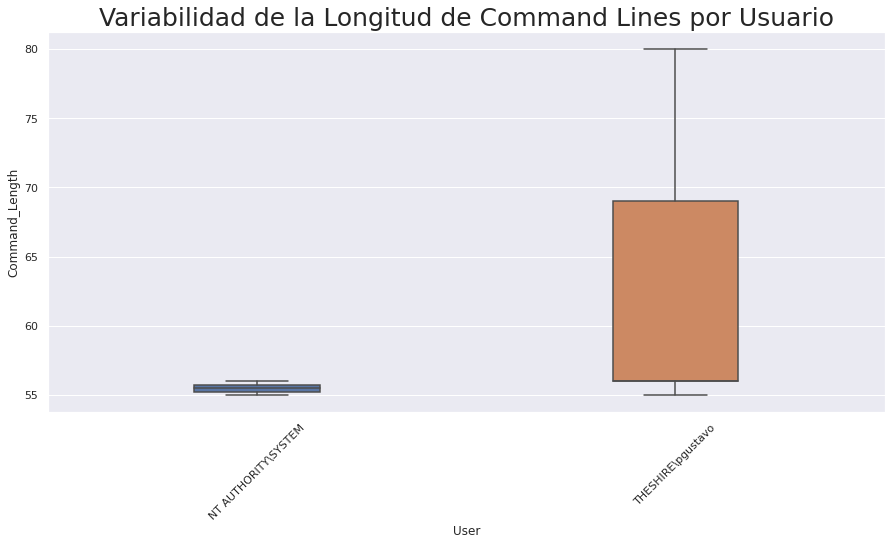

In [7]:
# Especificamos la fuente de datos
source = df

# Creamos el objeto Seaborn
boxPlotChart = sns.boxplot(x = 'User', y = 'Command_Length', data = source, orient = 'v',width = 0.3)

# Formateamos el Títutl ode nuestro gráfico
boxPlotChart.set_title("Variabilidad de la Longitud de Command Lines por Usuario", fontsize = 25)

# Formateamos el eje horizontal
boxPlotChart.set_xticklabels(boxPlotChart.get_xticklabels(), rotation=45);

## Muchas gracias!! Espero que este notebooks haya sido útil para empezar a revisar algunas técnicas para transformar datos :D

## Aún hay más por aprender :D